# THE SPARKS FOUNDATION
### TASK 1 - Prediction using Supervised ML
#### To Predict the percentage of marks of the students based on the number of hours they studied

# Author : Shrey Singh

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# preparing the data 

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# first we need to check if there is any null or missing values.

In [3]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

## now visualize the data as there is no null values.

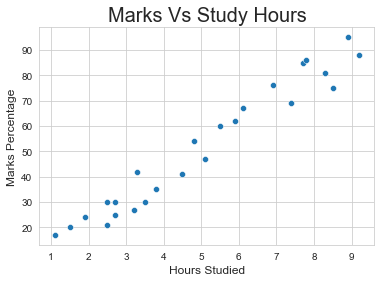

In [4]:
sns.set_style("whitegrid")
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# as it can be seen that its an positive correlation between marks and study hours.

# Lets plot a regression line to confirm the correlation.

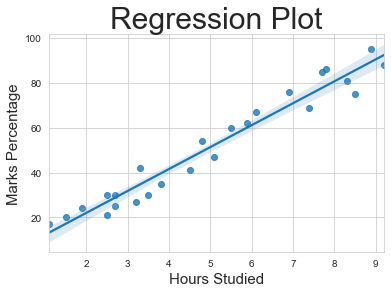

In [5]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=30)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

In [6]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


## Its time to train our model 
### splitting the data into training and testing 


In [7]:
# Assisgning X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two half
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

### now lets fit the model into linear regression



In [8]:
Regression = LinearRegression()
Regression.fit(train_X, train_y)
pred_y = Regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})

In [9]:
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### lets compare the predicted and actual values

In [10]:
comp = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
comp

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


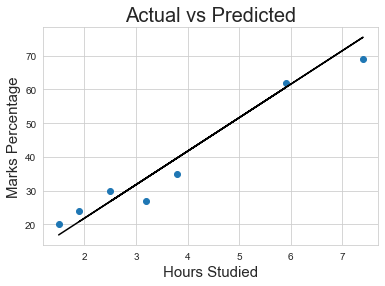

In [11]:
plt.scatter(x=test_X, y=test_y)
plt.plot(test_X, pred_y, color='black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

### Now evaluate the model 

In [12]:
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))

Mean absolute error:  4.130879918502486


### what if a student studies for 9.25hrs/day

In [13]:
hours = [9.25]
answer = Regression.predict([hours])
print("Score = {}".format(answer[0]))

Score = 93.89272889341655
